In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import math

####  The starting place for random variate generation is usually the generation of random numbers, which are random variates that are uniformly distributed on the interval from 0 to 1 (uniform [0, 1]).

## Uniform distribution

- Statistical meaning: Within a predefined interval, all outcomes have the same probability of occurring.

- Real-life examples: 
    - Six-sided dice: the probability of each side
    - Coin: the probability of head vs. tail
    - A deck of cards: the probability of each shape

- Graphs:
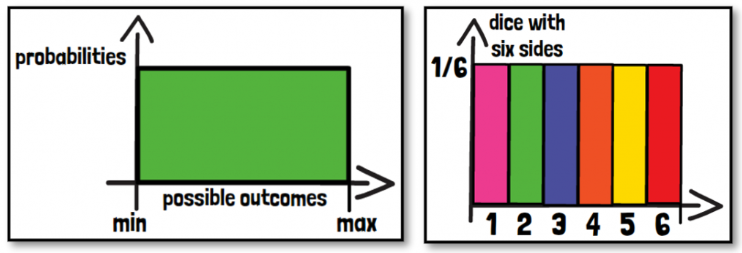

In [2]:
def generate_prn():
    return random.random()

In [3]:
# generate x uniform random variate for n equally likely outcomes

def generate_uniform_rv(n, x):
    outputs = []
    
    for i in range(x):
        intervals = np.array([j/n for j in range(1,n+1)])
        prn = generate_prn()

        first__guess = sum(prn >= intervals)
        if sum(prn == intervals) == 0: # prn is not on the boundary
            final_guess = first__guess + 1
        else: # prn is on the boundary
            final_guess = first__guess
        
        outputs.append(final_guess)
        
    return outputs

In [4]:
def draw_uniform_rv(n, x):
    rv_outputs = generate_uniform_rv(n, x)
    
    fig, ax = plt.subplots(1,2)

    ax[0].set_title(label='n outcomes = '+str(n)+', x = '+str(x))
    ax[0].set_ylabel('count')
    ax[0].hist(x=rv_outputs)
    
    ax[1].set_title(label='n outcomes = '+str(n)+', x = '+str(x))
    ax[1].set_ylabel('probablity')
    values = []
    probs = []
    total_num = len(rv_outputs)
    for i in rv_outputs:
        values.append(i)
        probs.append(rv_outputs.count(i)/total_num)
    ax[1].bar(x=values, height=probs)
    
    return rv_outputs

In [5]:
uniform_outcomes = 6

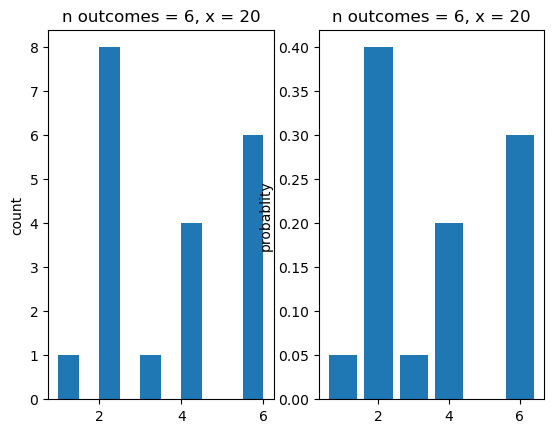

In [6]:
# small sample size
uniform_size = 20

uniform_rv_outputs = draw_uniform_rv(n=uniform_outcomes, x=uniform_size)

In [7]:
uniform_rv_outputs

[6, 2, 2, 4, 4, 2, 2, 2, 3, 4, 6, 6, 1, 2, 2, 6, 2, 6, 4, 6]

In [5]:
uniform_outcomes = 6

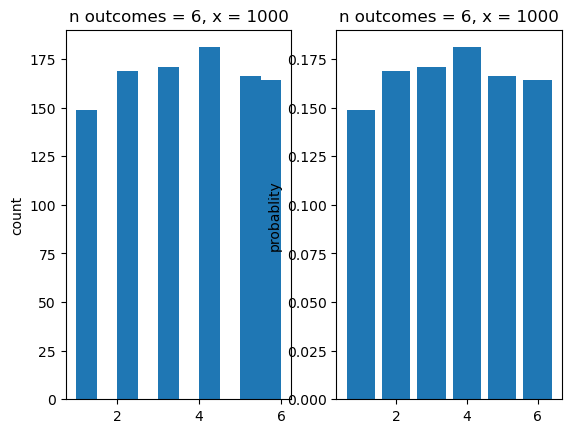

In [13]:
# big sample size
uniform_size = 1000

uniform_rv_outputs = draw_uniform_rv(n=uniform_outcomes, x=uniform_size)

In [14]:
print(uniform_rv_outputs)

[4, 4, 4, 3, 1, 3, 2, 4, 2, 6, 5, 3, 5, 1, 3, 1, 4, 3, 5, 6, 6, 5, 3, 3, 4, 6, 1, 3, 5, 5, 3, 5, 6, 3, 5, 5, 2, 1, 5, 3, 6, 4, 4, 6, 2, 5, 2, 5, 3, 6, 4, 1, 6, 2, 3, 3, 6, 5, 2, 2, 2, 4, 1, 1, 1, 4, 2, 6, 5, 5, 4, 4, 6, 1, 6, 4, 6, 5, 6, 5, 1, 2, 3, 6, 4, 5, 6, 2, 2, 2, 5, 1, 6, 4, 1, 4, 1, 3, 3, 1, 1, 5, 4, 3, 5, 4, 3, 5, 6, 2, 1, 4, 2, 2, 6, 4, 2, 2, 3, 3, 4, 1, 4, 4, 4, 5, 4, 4, 6, 5, 1, 6, 5, 2, 3, 2, 3, 1, 2, 5, 3, 3, 5, 2, 4, 6, 3, 2, 1, 6, 1, 2, 5, 6, 6, 5, 1, 5, 6, 2, 1, 2, 1, 2, 4, 4, 3, 5, 3, 6, 5, 4, 2, 6, 1, 5, 6, 3, 1, 6, 4, 2, 5, 4, 4, 6, 6, 4, 3, 5, 3, 1, 6, 6, 1, 5, 4, 3, 3, 1, 2, 4, 3, 6, 3, 2, 5, 3, 1, 2, 4, 2, 5, 3, 5, 5, 3, 3, 4, 4, 5, 1, 6, 6, 6, 3, 5, 5, 1, 5, 5, 4, 6, 6, 1, 1, 5, 5, 6, 2, 3, 2, 3, 2, 4, 1, 3, 1, 3, 5, 5, 1, 4, 5, 1, 3, 6, 1, 2, 1, 2, 4, 3, 5, 5, 6, 4, 3, 5, 2, 2, 3, 2, 6, 6, 5, 6, 2, 5, 6, 2, 6, 1, 4, 4, 4, 2, 6, 5, 5, 2, 2, 2, 6, 6, 1, 4, 3, 2, 6, 3, 4, 5, 6, 2, 4, 4, 3, 5, 2, 1, 6, 2, 5, 4, 6, 5, 6, 5, 3, 1, 5, 2, 4, 5, 2, 4, 6, 4, 4, 5, 2, 6, 

## Bernoulli distribution

- Statistical meaning: A discrete probability distribution that gives only two possible results in a trial (aka an experiment).

- Real-life examples: 
    - Flip a coin: the probability of head versus tail
    - Charity asks for donations: the probability of donated versus ignored

- Graphs:
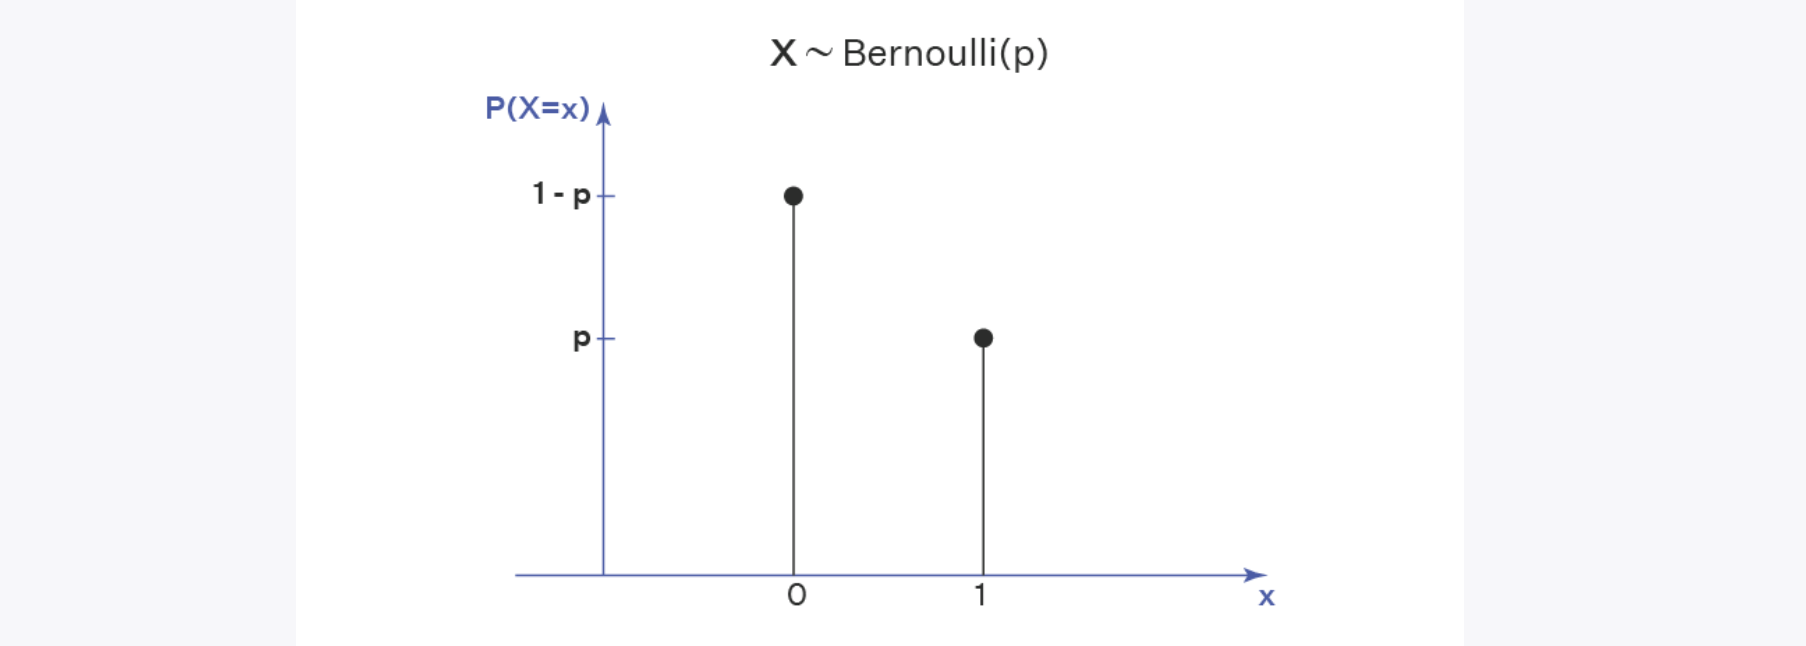

In [16]:
# generate x bernoulli random variates i.e. trials with probability p

def generate_bernoulli_rv(p, x):
    outputs = []
    prns = []
    
    for i in range(x):
        prn = generate_prn()
        prns.append(prn)
        
        if prn < 1-p:
            outputs.append(0)
        else:
            outputs.append(1)
    
    return outputs, prns

In [17]:
def draw_bernoulli_rv(p, x):
    rv_outputs, prns = generate_bernoulli_rv(p, x)
    
    x_axis = ['0', '1']
    y_axis = [rv_outputs.count(0), rv_outputs.count(1)]
    
    plt.title(label='p = '+str(p)+', x = '+str(x))
    plt.bar(x=x_axis, height=y_axis)
    
    return rv_outputs

In [32]:
bernoulli_p = 0.2

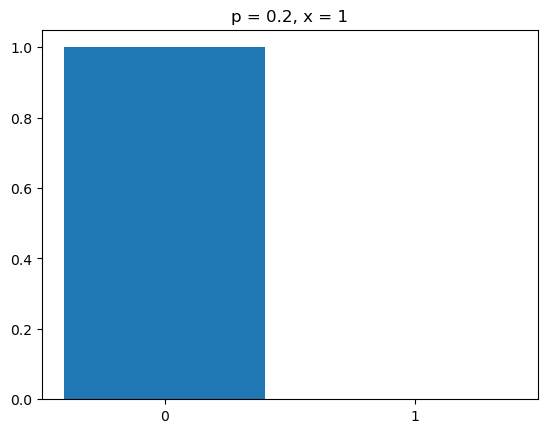

In [33]:
# small sample size
bernoulli_rv_outputs = draw_bernoulli_rv(p=bernoulli_p, x=1)

In [34]:
bernoulli_rv_outputs

[0]

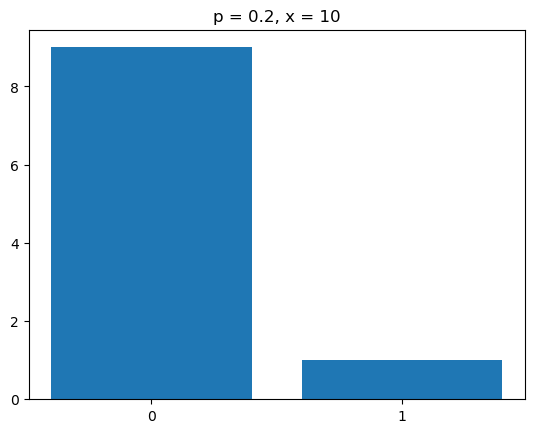

In [30]:
# small sample size
bernoulli_size = 10

bernoulli_rv_outputs = draw_bernoulli_rv(p=bernoulli_p, x=bernoulli_size)

In [31]:
print(bernoulli_rv_outputs)

[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]


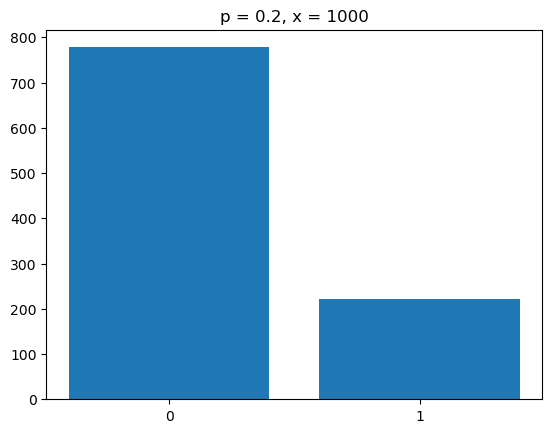

In [24]:
# big sample size
bernoulli_size = 1000

bernoulli_rv_outputs = draw_bernoulli_rv(p=bernoulli_p, x=bernoulli_size)

In [25]:
print(bernoulli_rv_outputs)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 

## Binomial distribution

- Statistical meaning: For an experiment (trial) that gives only 'Success' and 'Failure' outcome, the number of ‘Success’ in a sequence of *n* experiments (aka trials).

- Real-life examples: 
    - Flip a coin: the number of heads and tails in X times (aka trial, experiments)  
    - Charity asks for donations: the number donations in a month

- Graphs:
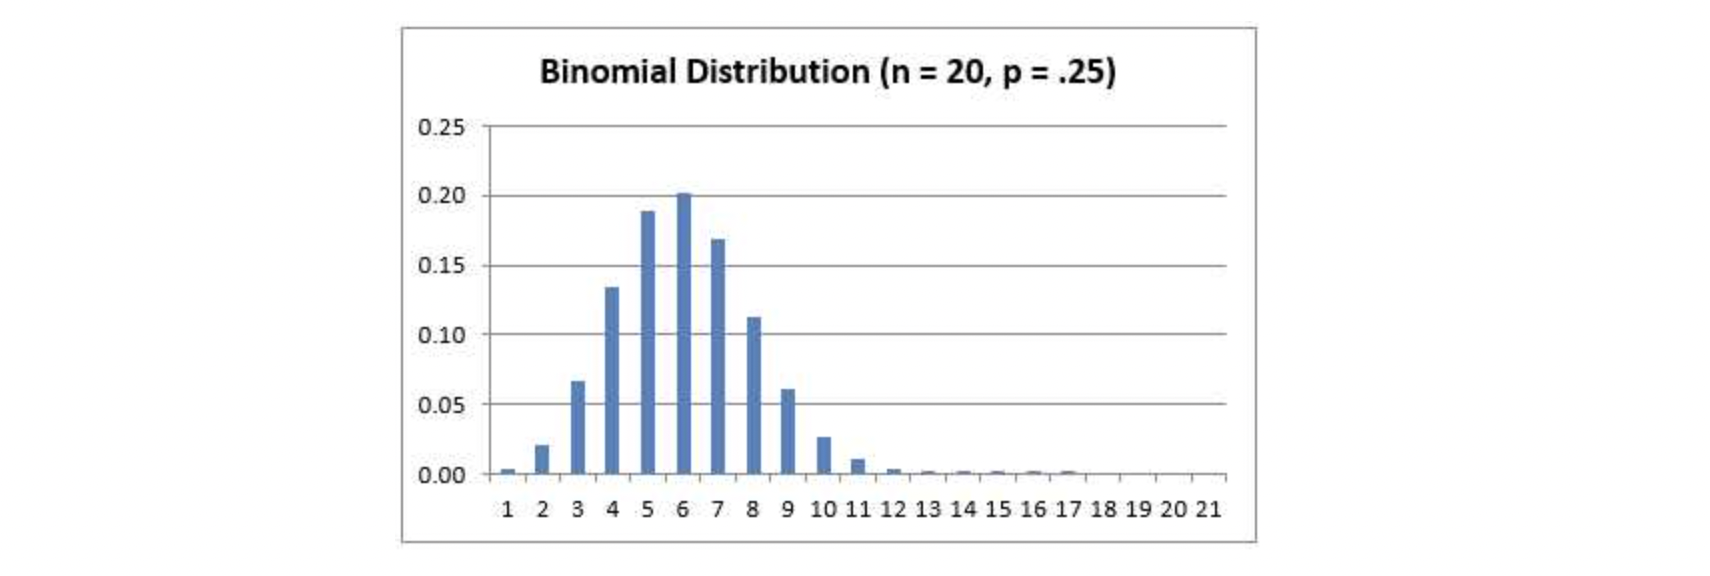

In [35]:
# generate x binomial random variates of bernoulli trials with probability p

def generate_binomial_rv(p, x):
    outputs = []
    
    for i in range(x):
        # the number of successes and failures out of Bernoulli trials
        bernoulli_output = generate_bernoulli_rv(p, x)[0] 
        # the number of successes (=1)
        outputs.append(bernoulli_output.count(1)) 
        
    return outputs

In [36]:
def draw_binomial_rv(p, x):
    rv_outputs = generate_binomial_rv(p, x)
    
    fig, ax = plt.subplots(1,2)

    ax[0].set_title(label='p = '+str(p)+', x = '+str(x))
    ax[0].set_ylabel('count')
    ax[0].hist(x=rv_outputs)
    
    ax[1].set_title(label='p = '+str(p)+', x = '+str(x))
    ax[1].set_ylabel('probablity')
    values = []
    probs = []
    total_num = len(rv_outputs)
    for i in rv_outputs:
        values.append(i)
        probs.append(rv_outputs.count(i)/total_num)
    ax[1].bar(x=values, height=probs)
    
    return rv_outputs

In [37]:
binomial_p = 0.7

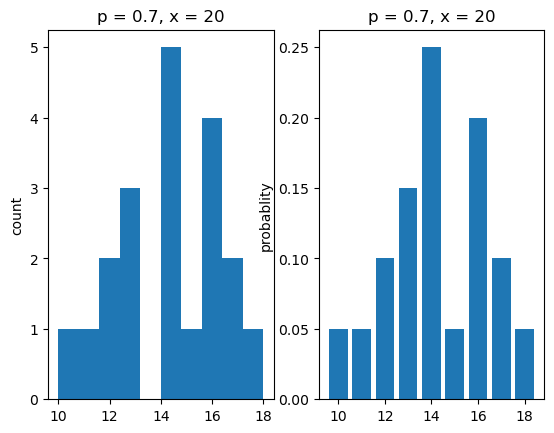

In [38]:
# small sample size
binomial_size = 20

binomial_rv_outputs = draw_binomial_rv(p=binomial_p, x=binomial_size)

In [40]:
print(binomial_rv_outputs)

[14, 16, 14, 13, 13, 14, 15, 16, 12, 10, 11, 16, 14, 13, 17, 18, 17, 14, 16, 12]


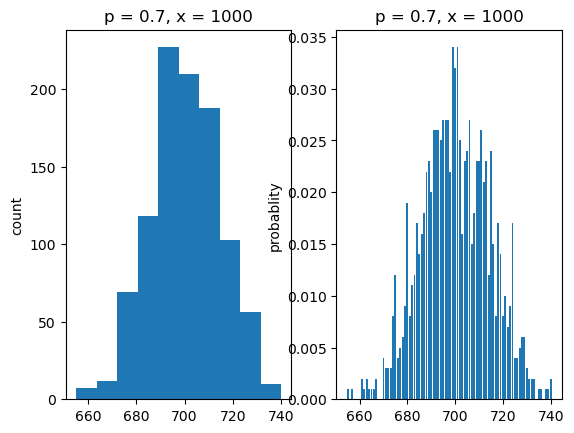

In [41]:
# big sample size
binomial_size = 1000

binomial_rv_outputs = draw_binomial_rv(p=binomial_p, x=binomial_size)

In [43]:
print(binomial_rv_outputs)

[687, 698, 682, 696, 719, 682, 729, 694, 717, 693, 687, 677, 713, 694, 710, 678, 720, 715, 680, 701, 704, 712, 701, 710, 682, 684, 689, 726, 693, 679, 691, 682, 683, 711, 692, 694, 716, 697, 726, 702, 703, 721, 733, 706, 704, 699, 677, 700, 689, 691, 700, 705, 683, 695, 696, 702, 714, 689, 694, 719, 689, 713, 687, 712, 699, 692, 718, 711, 702, 691, 698, 697, 694, 718, 675, 693, 674, 687, 689, 687, 702, 714, 689, 675, 701, 686, 700, 698, 691, 703, 693, 701, 700, 684, 712, 703, 692, 699, 716, 711, 700, 700, 714, 719, 714, 728, 695, 706, 711, 698, 679, 661, 700, 687, 708, 698, 718, 711, 711, 703, 677, 692, 698, 707, 686, 711, 684, 690, 730, 711, 712, 710, 713, 722, 697, 706, 706, 695, 692, 694, 694, 674, 701, 715, 692, 697, 695, 698, 700, 721, 688, 696, 714, 680, 690, 703, 686, 715, 698, 701, 702, 693, 699, 725, 695, 715, 706, 716, 688, 673, 707, 694, 689, 730, 689, 663, 711, 685, 707, 706, 676, 718, 721, 700, 678, 693, 692, 707, 713, 700, 680, 694, 723, 688, 701, 670, 713, 690, 724, 667,

## Geometric distribution

- Statistical meaning: The probability of having *X* Bernoulli trials with probability *p* until a Success occurs, i.e. the first success.

- Real-life examples: 
    - Job search: how many applications until receiving an offer
    - Defect products: how many items produced until the first defective unit

- Graphs:
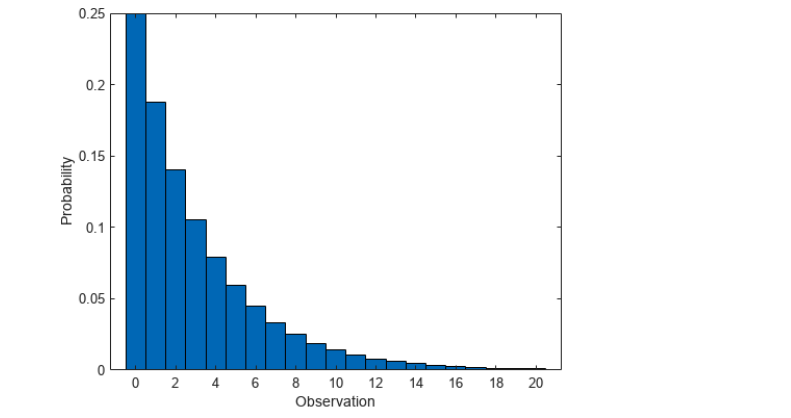

In [221]:
def geometric_pmf(p):
    outputs = []
    failure_count = 0
    
    while failure_count < 10:
        outputs.append((1-p)**failure_count*p)
        failure_count += 1
        
    return outputs, failure_count

In [222]:
def draw_geometric_distribution(p):
    rv_outputs, trial_count = geometric_pmf(p)

    plt.title(label='p = '+str(p))
    plt.ylabel('probablity')
    values = [i for i in range(trial_count)]
    plt.plot(values, rv_outputs)

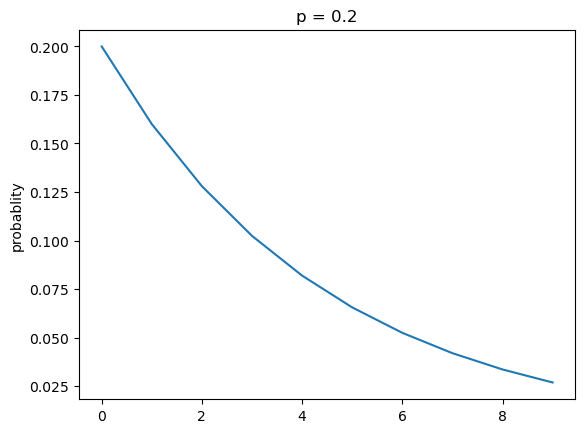

In [223]:
geometric_p = 0.2
draw_geometric_distribution(p=geometric_p)

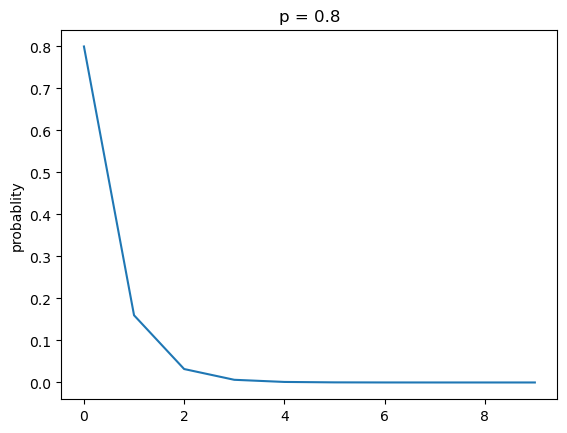

In [224]:
geometric_p = 0.8
draw_geometric_distribution(p=geometric_p)

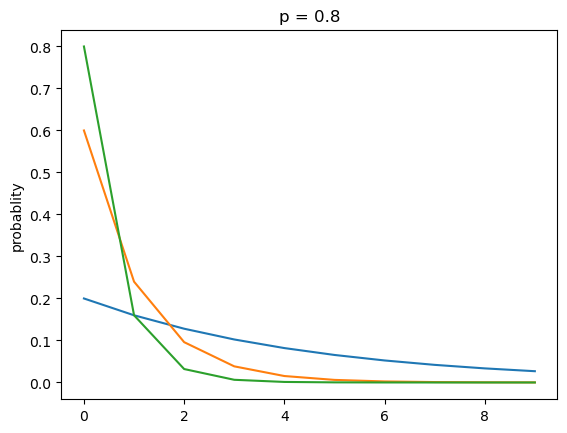

In [225]:
draw_geometric_distribution(p=0.2)
draw_geometric_distribution(p=0.6)
draw_geometric_distribution(p=0.8)

In [44]:
# generate x geometric random variate of bernoulli trials with probability p

def generate_geometric_rv(p, x):
    outputs = []
    trial_counts = []
    
    for i in range(x):
        bernoulli_outcome = 0
        trial_count = 0
        
        while bernoulli_outcome != 1: # keep going until a Success occurs
            bernoulli_outcome = generate_bernoulli_rv(p, 1)[0][0]
            trial_count += 1

        outputs.append((1-p)**(trial_count-1)*p)
        trial_counts.append(trial_count) 
        
    return outputs, trial_counts

In [45]:
def draw_geometric_rv(p, x):
    rv_outputs, trial_counts = generate_geometric_rv(p, x)

    plt.title(label='p = '+str(p))
    values = [i for i in trial_counts]
    plt.bar(values, rv_outputs)
    
    return trial_counts

In [46]:
geometric_p = 0.2

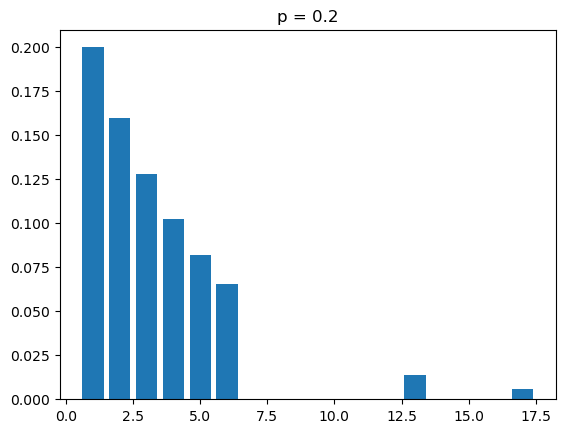

In [47]:
# small sample size
geometric_size = 10

geometric_rv_outputs = draw_geometric_rv(p=geometric_p, x=geometric_size)

In [48]:
print(geometric_rv_outputs)

[3, 2, 17, 1, 5, 13, 6, 1, 4, 1]


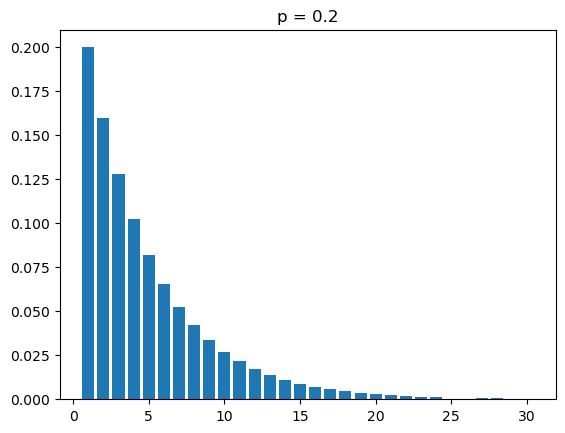

In [49]:
# big sample size
geometric_size = 1000

geometric_rv_outputs = draw_geometric_rv(p=geometric_p, x=geometric_size)

In [50]:
print(geometric_rv_outputs)

[7, 4, 2, 3, 12, 7, 5, 2, 3, 2, 17, 4, 2, 1, 1, 2, 9, 7, 1, 3, 2, 10, 3, 1, 5, 11, 1, 5, 6, 10, 1, 4, 6, 4, 4, 4, 6, 3, 3, 2, 1, 2, 2, 7, 9, 5, 1, 12, 5, 2, 4, 2, 2, 1, 3, 1, 1, 4, 9, 3, 5, 5, 10, 2, 7, 2, 6, 10, 13, 5, 9, 2, 2, 6, 4, 2, 1, 6, 1, 23, 3, 4, 7, 11, 9, 1, 3, 1, 4, 2, 2, 5, 8, 1, 4, 1, 4, 5, 3, 9, 3, 1, 8, 3, 3, 6, 1, 1, 10, 1, 4, 6, 7, 1, 2, 1, 1, 1, 3, 20, 1, 6, 10, 13, 5, 12, 5, 6, 5, 5, 3, 5, 3, 7, 10, 5, 1, 1, 8, 5, 1, 7, 1, 14, 9, 1, 13, 4, 15, 3, 4, 4, 5, 2, 5, 2, 3, 2, 13, 2, 6, 4, 5, 2, 5, 8, 2, 3, 17, 1, 2, 17, 1, 12, 4, 8, 5, 5, 1, 2, 3, 3, 1, 6, 3, 4, 5, 5, 19, 5, 1, 1, 2, 3, 1, 2, 14, 2, 5, 1, 3, 6, 2, 3, 12, 3, 3, 14, 3, 9, 7, 4, 1, 5, 1, 6, 12, 18, 6, 5, 1, 1, 2, 2, 6, 3, 1, 1, 3, 4, 1, 2, 2, 9, 2, 12, 6, 2, 3, 16, 1, 3, 6, 3, 1, 6, 1, 8, 2, 1, 3, 2, 14, 2, 1, 20, 11, 10, 3, 4, 2, 4, 2, 4, 9, 1, 4, 8, 1, 3, 1, 5, 1, 5, 3, 2, 1, 1, 5, 4, 6, 1, 1, 11, 8, 8, 6, 1, 5, 3, 2, 20, 11, 1, 3, 13, 14, 3, 2, 3, 4, 10, 11, 2, 4, 4, 5, 5, 2, 2, 4, 9, 1, 4, 1, 12, 1, 12, 

## Poisson distribution

- Statistical meaning: The probability of an event happening *k* times within a time period.

- Real-life examples: 
    - Call Center: the probability that the call center receives more than 5 phone calls during the noon, given the average 3 calls per hour during that time period.
    - Broadcast: the probablity that the news reporter says "uh" more than three times during a broadcast, given the average 2 "uh" per broadcast.

- Graphs:
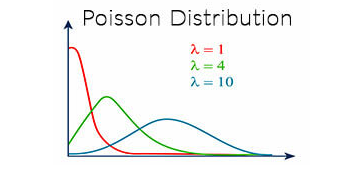

In [51]:
# generate x poisson random variate within a time period

def generate_poisson_rv(l, x):
    outputs = []
    
    for i in range(x):
        prn = generate_prn()
        time_count = 0 
        cmf = 0
        while prn > cmf:
            pmf = math.e**-l*l**time_count/math.factorial(time_count)
            cmf = cmf + pmf
            time_count += 1
        outputs.append(time_count)    
        
    return outputs

In [52]:
def draw_poisson_rv(l, x):
    rv_outputs = generate_poisson_rv(l, x)

    plt.title(label='lambda = '+str(l))
    
    values = []
    counts = []
    for i in set(rv_outputs):
        values.append(i)
        counts.append(rv_outputs.count(i))

    plt.plot(values, counts)
    
    return rv_outputs

In [53]:
poisson_lambda = 2

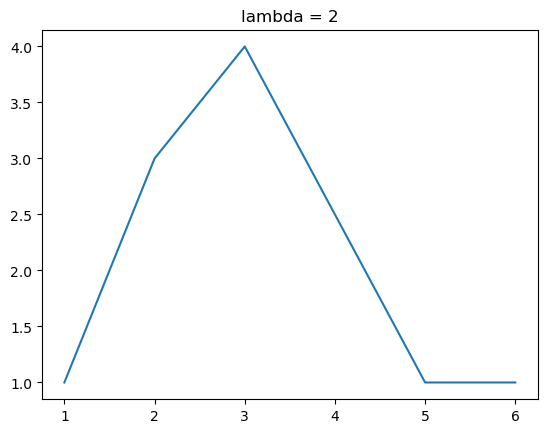

In [54]:
# small sample size
lambda_size = 10

poisson_rv_outputs = draw_poisson_rv(l=poisson_lambda, x=lambda_size)

In [55]:
print(poisson_rv_outputs)

[5, 2, 2, 3, 3, 6, 1, 2, 3, 3]


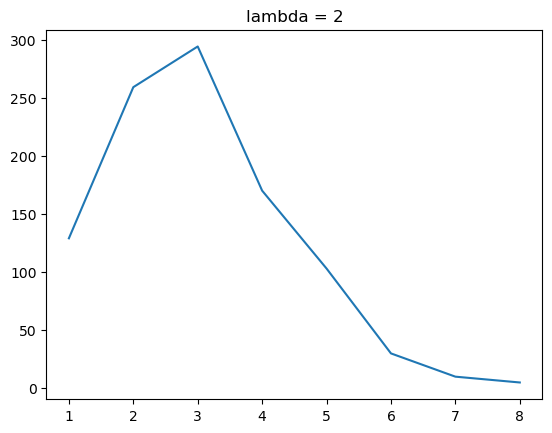

In [56]:
# big sample size
poisson_size = 1000

poisson_rv_outputs = draw_poisson_rv(l=poisson_lambda, x=poisson_size)

In [57]:
print(poisson_rv_outputs)

[2, 2, 3, 2, 4, 3, 1, 3, 6, 4, 4, 4, 5, 4, 3, 2, 7, 2, 4, 2, 2, 2, 2, 5, 4, 2, 4, 2, 2, 2, 5, 2, 1, 3, 1, 3, 4, 2, 3, 4, 2, 4, 4, 4, 4, 3, 4, 2, 2, 4, 4, 5, 4, 4, 1, 2, 1, 2, 4, 1, 4, 3, 5, 3, 4, 4, 4, 2, 1, 3, 3, 5, 3, 1, 2, 4, 7, 4, 1, 2, 2, 6, 4, 3, 2, 1, 3, 1, 4, 3, 2, 2, 5, 1, 1, 2, 3, 2, 1, 3, 5, 1, 2, 1, 4, 1, 1, 3, 2, 4, 2, 1, 2, 2, 4, 3, 2, 7, 4, 5, 3, 2, 3, 3, 5, 1, 4, 2, 3, 2, 5, 3, 2, 3, 1, 3, 1, 1, 5, 2, 1, 2, 2, 5, 2, 2, 3, 2, 3, 3, 5, 3, 2, 3, 3, 3, 1, 3, 2, 2, 5, 3, 8, 3, 2, 4, 2, 4, 3, 5, 4, 5, 2, 3, 1, 1, 4, 3, 3, 1, 2, 3, 1, 3, 3, 4, 2, 2, 2, 2, 4, 5, 5, 2, 3, 1, 4, 4, 3, 6, 3, 4, 2, 3, 5, 2, 5, 2, 3, 3, 3, 3, 2, 2, 2, 5, 1, 2, 1, 3, 7, 2, 3, 3, 2, 3, 1, 5, 3, 3, 5, 2, 3, 2, 4, 4, 3, 3, 3, 2, 3, 2, 3, 4, 2, 3, 3, 2, 3, 3, 1, 2, 3, 4, 4, 3, 2, 1, 3, 4, 5, 3, 1, 2, 3, 6, 3, 3, 5, 3, 3, 6, 3, 1, 4, 2, 2, 3, 3, 5, 4, 1, 1, 2, 4, 2, 4, 3, 3, 5, 2, 2, 5, 1, 1, 3, 3, 1, 3, 3, 4, 5, 2, 4, 4, 1, 2, 1, 4, 3, 2, 3, 1, 4, 4, 6, 3, 7, 4, 4, 3, 3, 2, 5, 2, 2, 1, 2, 1, 2, 3, 3, 1, 

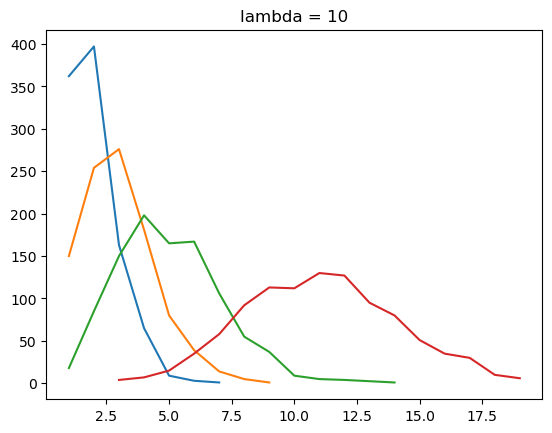

In [60]:
poisson_size = 1000

poisson_lambda = 1
poisson_rv_outputs = draw_poisson_rv(l=poisson_lambda, x=poisson_size)

poisson_lambda = 2
poisson_rv_outputs = draw_poisson_rv(l=poisson_lambda, x=poisson_size)

poisson_lambda = 4
poisson_rv_outputs = draw_poisson_rv(l=poisson_lambda, x=poisson_size)

poisson_lambda = 10
poisson_rv_outputs = draw_poisson_rv(l=poisson_lambda, x=poisson_size)

## Exponential distribution

- Statistical meaning: The probability of *x* time unit elapsed between events, given the event has a Poisson rate *lambda*, that is the event occurs *lambda* times on average within a time period.

- Real-life examples: 
    - Earthquake: the amount of time from now until an earthquake occurs
    - Airport: the amount of time passengers arriving at the the security point

- Graphs: (Y axis is basically lambda, the area below the curve is the probability)
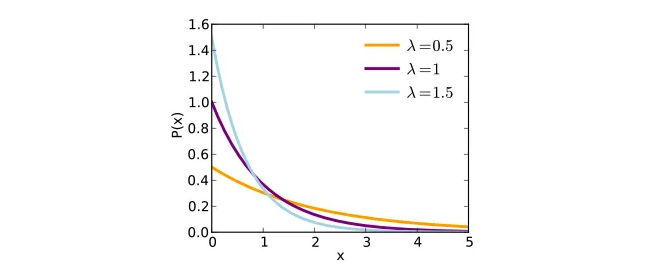

In [61]:
# generate x exponential random variate between two consecutive events

def generate_exponential_rv(l, x):
    outputs = []
    
    for i in range(x):
        prn = generate_prn()
        cdf = 0
        time_unit = 0
        
        while prn > cdf:
            cdf = 1-math.e**(-l*time_unit)
            time_unit += 1
        
        # offset 1 that is added in the last round
        time_unit -= 1
        
        outputs.append(time_unit)    
        
    return outputs

In [62]:
def draw_exponential_rv(l, x):
    rv_outputs = generate_exponential_rv(l, x)

    plt.title(label='lambda = '+str(l))
    
    values = []
    counts = []
    for i in set(rv_outputs):
        values.append(i)
        counts.append(rv_outputs.count(i))
    
    if x <= 10:
        plt.bar(x=values, height=counts)
    else:
        plt.plot(values, counts)
    
    return rv_outputs

In [63]:
exponential_lambda = 1

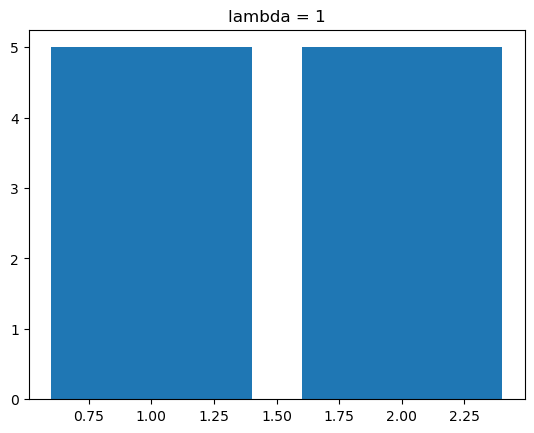

In [64]:
# small sample size
exponential_size = 10

exponential_rv_outputs = draw_exponential_rv(l=exponential_lambda, 
                                             x=exponential_size)

In [65]:
print(exponential_rv_outputs)

[2, 1, 1, 1, 1, 1, 2, 2, 2, 2]


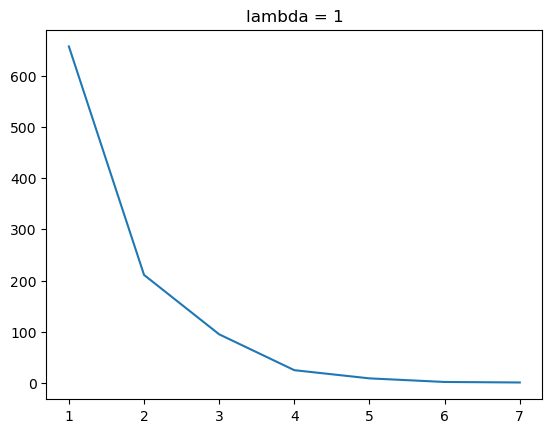

In [66]:
# big sample size
exponential_size = 1000

exponential_rv_outputs = draw_exponential_rv(l=exponential_lambda, 
                                             x=exponential_size)

In [68]:
print(exponential_rv_outputs)

[3, 1, 1, 1, 3, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 3, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 4, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 3, 1, 2, 1, 1, 1, 1, 1, 3, 2, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 3, 1, 4, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 3, 1, 1, 1, 2, 1, 1, 1, 3, 2, 1, 1, 2, 1, 1, 1, 3, 2, 1, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 1, 2, 1, 1, 3, 1, 1, 1, 5, 3, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 2, 1, 2, 1, 2, 3, 1, 1, 5, 1, 2, 3, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 3, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 3, 1, 5, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 4, 1, 1, 1, 1, 1, 2, 1, 1, 1, 3, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 3, 1, 3, 2, 3, 4, 1, 1, 1, 1, 1, 1, 2, 1, 

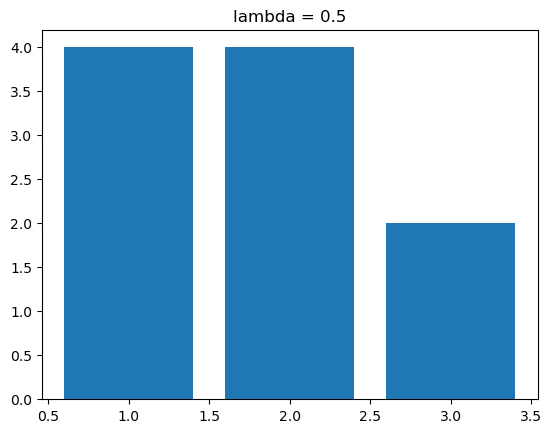

In [590]:
exponential_lambda = 0.5
exponential_size = 10
d = draw_exponential_rv(l=exponential_lambda, x=exponential_size)

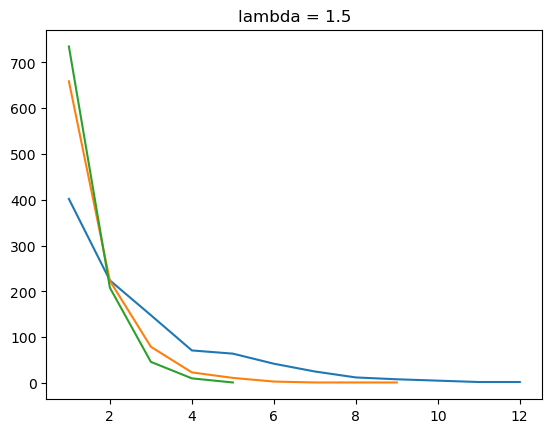

In [69]:
exponential_size = 1000

exponential_lambda = 0.5
d = draw_exponential_rv(l=exponential_lambda, x=exponential_size)

exponential_lambda = 1
d = draw_exponential_rv(l=exponential_lambda, x=exponential_size)

exponential_lambda = 1.5
d = draw_exponential_rv(l=exponential_lambda, x=exponential_size)

## Weibull distribution

- Statistical meaning: A generalization of Exponential Distribution, which is the probability of *x* time unit elapsed between events, given the event has a Poisson rate *lambda*. *k* in Weibull distribution: < 1 meaning failure decreases with time; > 1 meaning failure increases with time; = 1 meaning failure constant with time, that is Exponential distribution.

- Real-life examples: 
    - Defect products: the amount of times until the first defective unit; the amount of times between failure events
    - Web use: The amount of time a user spends on a web page (a.k.a between websites)

- Graphs: 
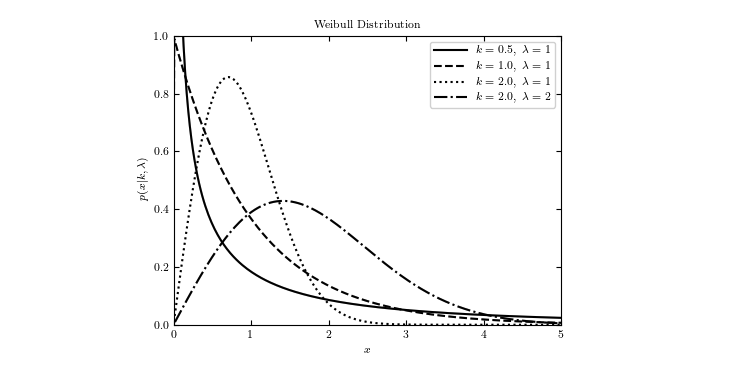

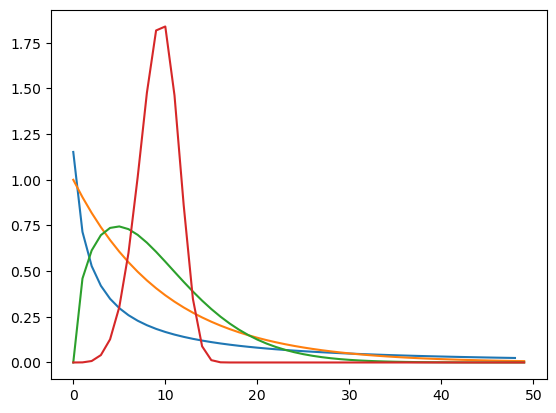

In [793]:
# probability density function

l = 1
ks = [0.5, 1, 1.5, 5]

for k in ks:
    outputs = []
    for x in range(50):
        if k < 1 and x == 0:
            continue
        x = x/10
        y = (k/l)*(x/l)**(k-1)*math.e**-(x/l)**k
        outputs.append(y)
    plt.plot(outputs)



In [70]:
# generate x weibull random variate between two consecutive events

def generate_weibull_rv(l, x, k):
    outputs = []
    
    for i in range(x):
        prn = generate_prn()
        
        logged_num = (-math.log(prn, 2))**1/k
        
        X = 1/l * logged_num
        
        outputs.append(X)    
        
    return outputs

In [71]:
def draw_weibull_rv(l, x, k):
    rv_outputs = generate_weibull_rv(l, x, k)

    plt.title(label='lambda = '+str(l)+';k = '+str(k))
    
    values = []
    counts = []
    for i in set(rv_outputs):
        values.append(i)
        counts.append(rv_outputs.count(i))
    
    plt.hist(rv_outputs)
    
    return rv_outputs

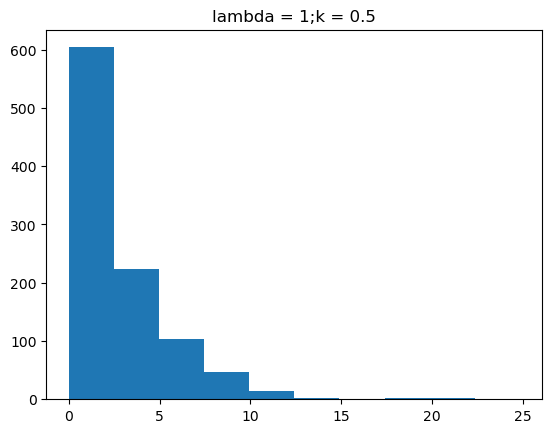

In [72]:
weibull_lambda = 1
weibull_k = 0.5
weibull_size = 1000

weibull_rv_outputs = draw_weibull_rv(l=weibull_lambda, 
                                     x=weibull_size, 
                                     k=weibull_k)

In [73]:
print(weibull_rv_outputs)

[3.470217409933373, 2.5134747142662954, 3.808221824500692, 1.1267477894969984, 4.746774653778324, 5.07516757356993, 7.920217711813241, 2.310825399922773, 0.6838420121508574, 3.082628203065108, 11.302992056958185, 8.49648893789689, 9.357122421370917, 2.0781323304947827, 1.9781164240493867, 0.5708548600294922, 0.7240201171981394, 0.7612807263823491, 4.409168192721758, 0.05878021997759698, 4.734574355625346, 3.8826761120741615, 0.7540977799529718, 0.07503195947434294, 0.2928043212258889, 6.372485020950047, 2.1401374548172605, 0.37655807539140757, 1.556204810450071, 0.026908620044376337, 0.13343640316766464, 4.717687578438512, 13.187117036049601, 2.829443917060838, 6.824332152860757, 0.9743279261593605, 6.5013627821498, 0.9318731630524645, 1.4424357932842038, 4.3802737317126335, 4.176323004766693, 0.734159232908427, 5.43579069289816, 0.07356409492009319, 3.5982045502603475, 0.5238291925445387, 0.825982061005706, 0.14126619023748763, 9.502313775619278, 0.3766005910109744, 0.573663798332889,

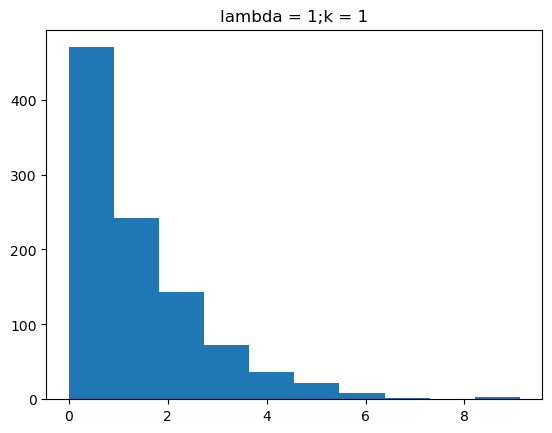

In [74]:
weibull_lambda = 1
weibull_k = 1
weibull_size = 1000

weibull_rv_outputs = draw_weibull_rv(l=weibull_lambda, 
                                     x=weibull_size, 
                                     k=weibull_k)

In [75]:
print(weibull_rv_outputs)

[3.7857350646127523, 0.2537089801431854, 4.3117983082811975, 2.6070954748208504, 0.22021805518911589, 0.5400100854307927, 1.5433019129969676, 0.33925124096610926, 0.9240199289707555, 0.3766909331451616, 2.1044085438872036, 1.8517687441216366, 2.663901600435436, 2.3164687593814626, 0.09151986101875308, 1.2367684154107899, 0.011738985742745999, 0.6336338740304203, 0.30266026147471803, 0.03035809204411769, 2.312221731566788, 2.568152623409909, 0.92654652038633, 0.18547418105599725, 4.116405197012012, 0.3922753684850519, 0.5915864031120697, 0.3212470813895212, 1.7471976556183988, 2.6180119853644794, 0.1300861103375794, 0.07106169554762852, 0.43906226377780816, 0.3530227513877124, 0.9068150026010361, 1.2216195005290584, 2.2895671031557723, 3.8824493002022797, 0.46031258380319534, 0.9429297317621831, 2.325274327166568, 0.11764306898244559, 0.0871079553112252, 0.12511500649461757, 3.4369865973949176, 0.740739577973595, 1.273734112028921, 0.3290798252065278, 0.44193641285437957, 0.250425247924

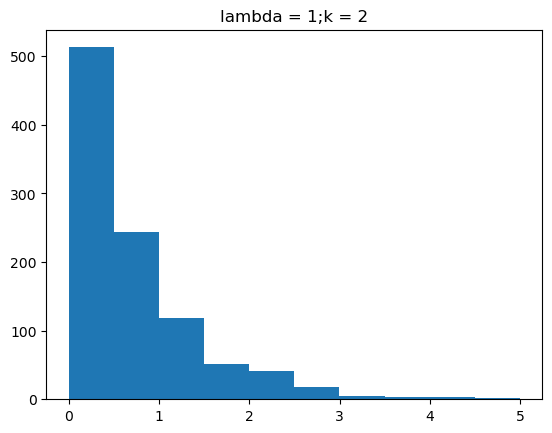

In [76]:
weibull_lambda = 1
weibull_k = 2
weibull_size = 1000

weibull_rv_outputs = draw_weibull_rv(l=weibull_lambda, 
                                     x=weibull_size, 
                                     k=weibull_k)

In [77]:
print(weibull_rv_outputs)

[0.8732658257263778, 1.485746901351054, 2.1597208631681903, 0.7397251452258184, 0.378439310635866, 0.9090660360245549, 1.3764513248028496, 0.4705051762139102, 0.7156711502687096, 0.5755319191831965, 0.25060986657560247, 0.5327839742446349, 1.9225337741164044, 0.3129461883926297, 0.18341976225196602, 1.2304982586737527, 1.39003238562189, 0.1655571684258254, 0.0009220256717775618, 3.4503642507200576, 1.4400998078537695, 0.13150716654130865, 0.09134640909728817, 0.1486896508769675, 0.010563566539175145, 0.9650153827463139, 0.33347619676288703, 0.7941809034053301, 1.9334434642873726, 0.08917341432230844, 0.17513036244560276, 2.267994311267362, 1.6280032212121698, 0.20445711792182314, 0.36057120685437294, 0.18649864677188494, 0.413350907022627, 0.05787262130142231, 0.360992823602668, 0.20629076331118462, 0.5058967945333488, 0.19905397767443464, 2.129529596158235, 0.0053315597983495415, 0.5074331703574158, 0.17468972458414878, 0.5309472493462676, 0.174370581213839, 0.14315126509738088, 0.311

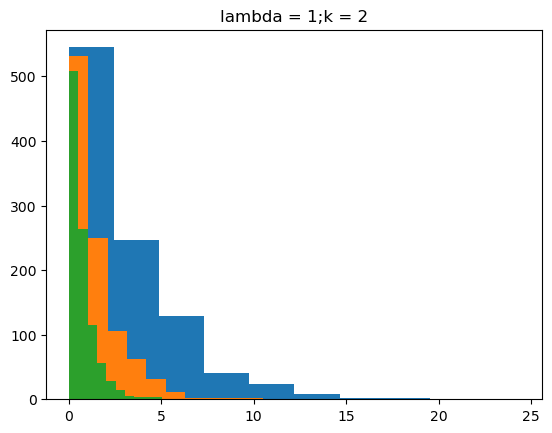

In [701]:
weibull_size = 1000
weibull_lambda = 1

weibull_k = 0.5 # failure decreases with time
weibull_rv_outputs = draw_weibull_rv(l=weibull_lambda, x=weibull_size, k=weibull_k)

weibull_k = 1 # failure constant with time
weibull_rv_outputs = draw_weibull_rv(l=weibull_lambda, x=weibull_size, k=weibull_k)

weibull_k = 2 # failure increases with time
weibull_rv_outputs = draw_weibull_rv(l=weibull_lambda, x=weibull_size, k=weibull_k)

## Normal distribution

- Statistical meaning: A continuous probability distribution with mean and variance, and the data is symmetrically distributed with no skew

- Real-life examples: 
    - Heights
    - SAT scores
    - Restaurant Reviews

- Graphs: 
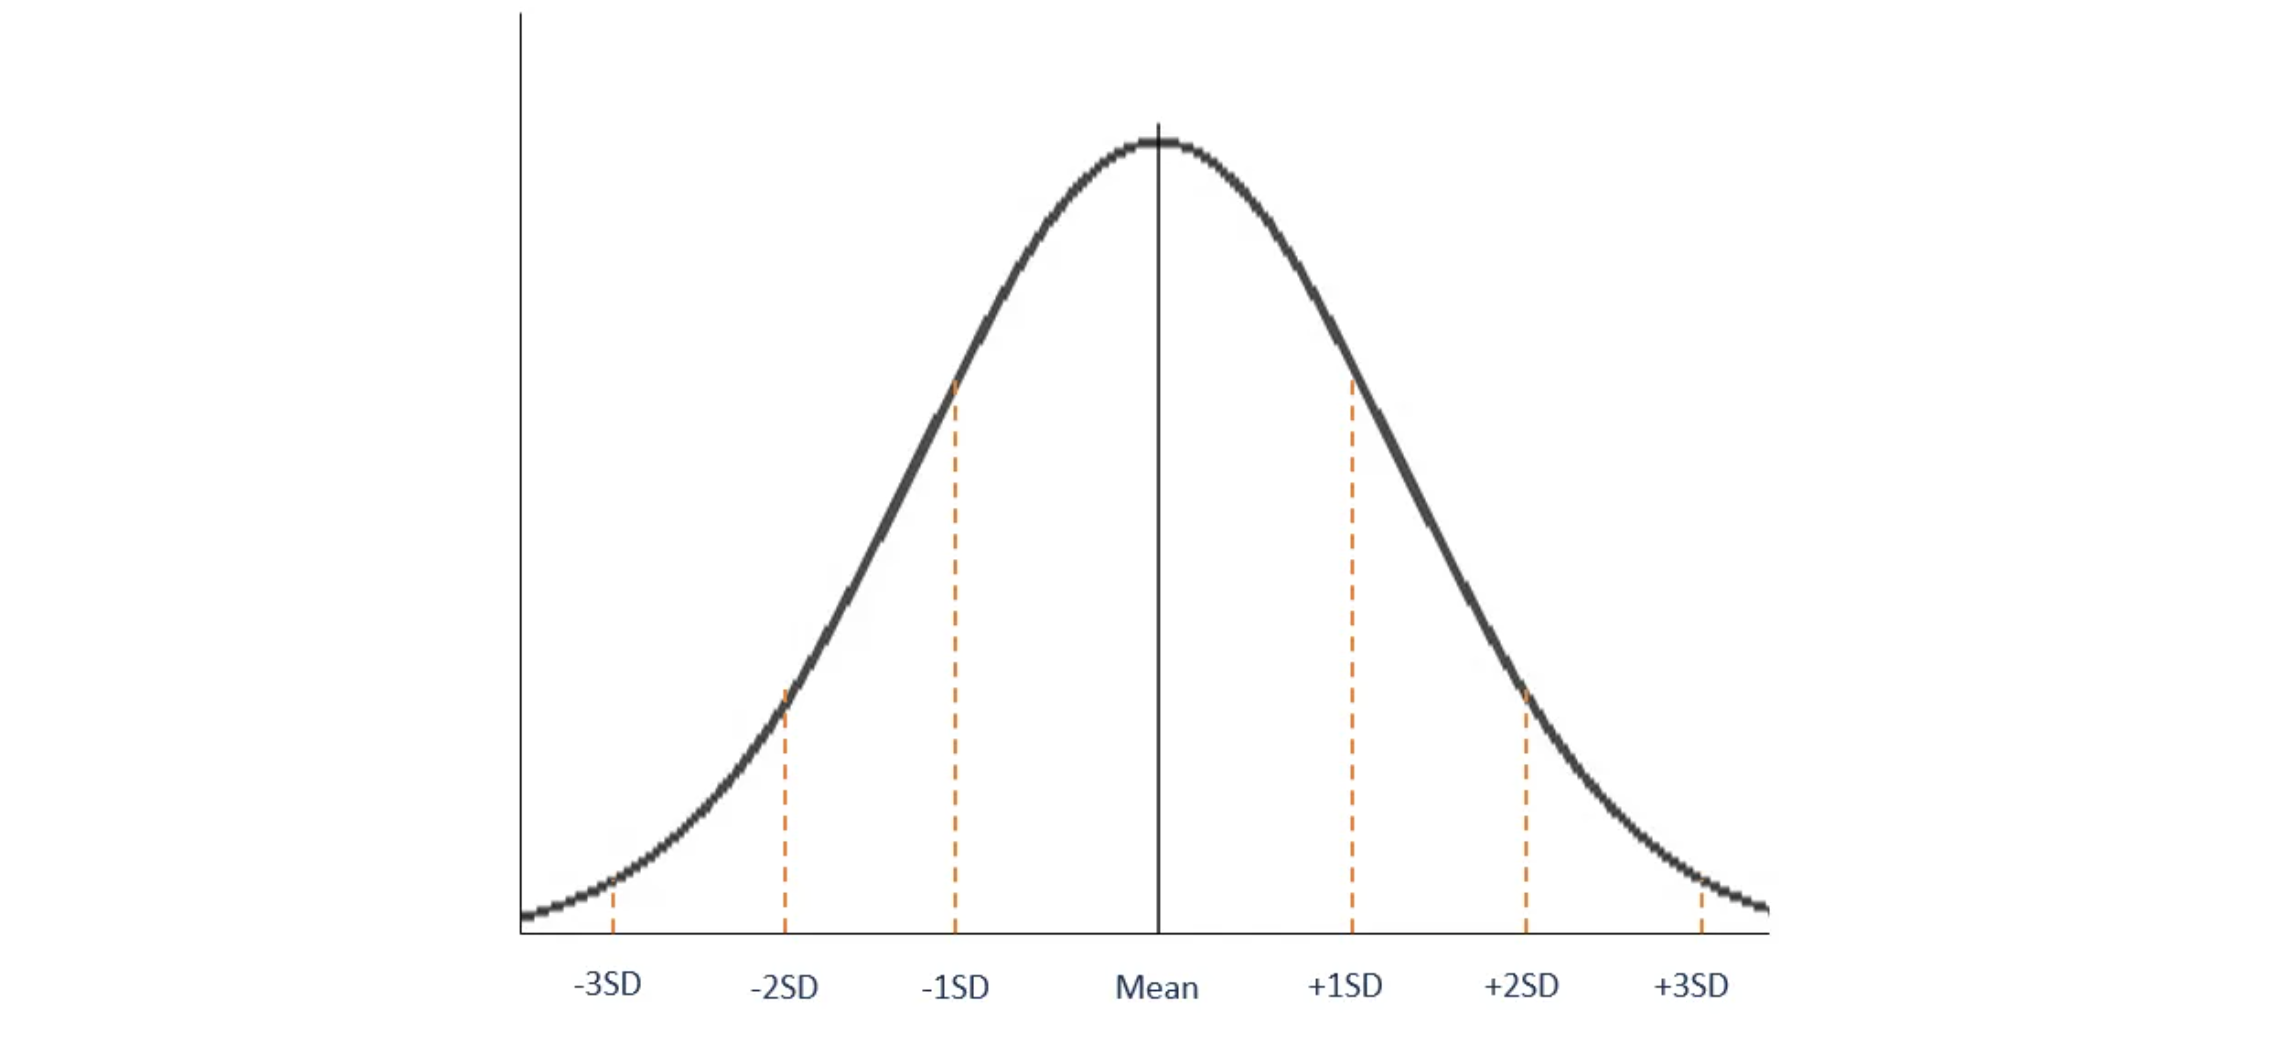

In [78]:
# generate x normal random variate with mean and variance

def generate_normal_nv(mu, variance, x):
    outputs = []
    
    for i in range(x):
        U = generate_prn()
        Z = (U**0.135-(1-U)**0.135)/0.1975
        X = mu + math.sqrt(variance)*Z
        outputs.append(X)

    return outputs

In [79]:
def draw_normal_rv(mu, variance, x):
    rv_outputs = generate_normal_nv(mu, variance, x)

    plt.title(label='mu = '+str(mu)+';variance = '+str(variance))
    
    values = []
    counts = []
    for i in set(rv_outputs):
        values.append(i)
        counts.append(rv_outputs.count(i))
    
    plt.hist(rv_outputs)
    
    return rv_outputs

In [80]:
normal_mu = 3
normal_variance = 16

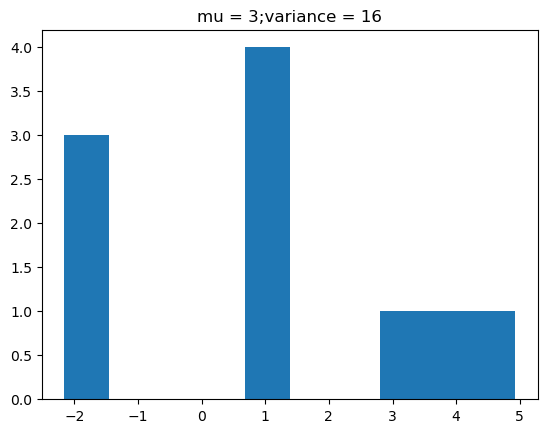

In [81]:
# small sample size
normal_size = 10

normal_rv_outputs = draw_normal_rv(mu=normal_mu, variance=normal_variance, x=normal_size)

In [83]:
print(normal_rv_outputs)

[1.354931470788159, 0.9594691876677541, -1.4913024172426006, 3.9289905741210376, 0.6870512442306982, -1.720689476647344, 1.3596409732210444, -2.1560655209759796, 3.308013166879121, 4.929289778169715]


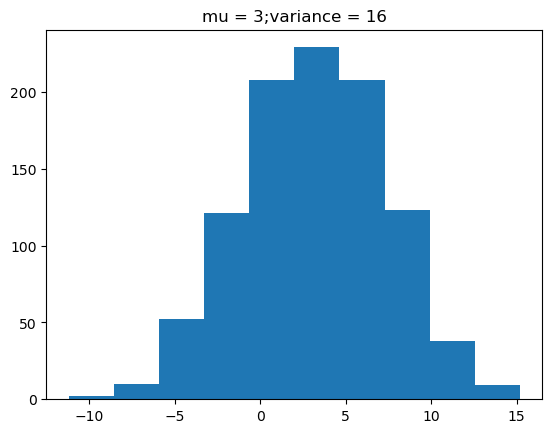

In [84]:
# big sample size
normal_size = 1000

normal_rv_outputs = draw_normal_rv(mu=normal_mu, variance=normal_variance, x=normal_size)

In [85]:
print(normal_rv_outputs)

[7.845823112878011, 3.488194359828446, 5.420273360578502, -0.23472708880935222, 3.717188021665586, 3.8530151793610514, 3.6305306798235755, 8.836584217837942, 2.704083349500283, 4.917137921364507, 5.677882251636481, 10.83043577720414, 0.938476369499337, 2.600831642247603, 1.5130006070731044, 0.5822726840376151, -0.7411570289757523, 3.5171456087537294, 0.8101464270457233, 3.4343002698146923, 5.5672990112410226, 7.014991467931956, 0.6999969506227135, 4.343435929100002, -0.6520651752326687, 5.267828574431393, 6.073903345768543, 8.367862254254177, 5.752525571369446, -1.3613957520083453, 3.5911016110114815, 3.618810711888465, -0.335972000666966, 1.3295478135687946, 4.15501992804431, 5.716273501210541, -4.266576697609818, 5.673440412787482, 3.457962430326486, 6.543082201439097, 2.234866331094367, 6.286354083618733, 2.1982172706142347, 7.661011567987889, -2.356714072008521, 5.388824173021812, -2.3398785716399724, 3.9712331606644864, -3.5635758471192345, -2.8358474791443733, -1.8776016361790386